In [4]:
import cv2
import numpy as np
import os
from pathlib import Path
import time

In [ ]:
img = np.load('img.npy')
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [113]:
from ultralytics import YOLO

# Load a model
#model = YOLO("yolo11n.pt")  # load an official model
model = YOLO("michaloviny/best_ones/v8n_120e_480p.pt")  # load a custom trained model
# Export the model
model.export(format="onnx")

Ultralytics 8.3.81 🚀 Python-3.12.9 torch-2.6.0+cu124 CPU (12th Gen Intel Core(TM) i7-12650H)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'michaloviny/best_ones/v8n_120e_480p.pt' with input shape (1, 3, 480, 480) BCHW and output shape(s) (1, 9, 4725) (5.9 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.48...
ONNX: export success ✅ 0.5s, saved as 'michaloviny/best_ones/v8n_120e_480p.onnx' (11.6 MB)

Export complete (0.7s)
Results saved to /home/erik/Documents/lar/michaloviny/best_ones
Predict:         yolo predict task=detect model=michaloviny/best_ones/v8n_120e_480p.onnx imgsz=480  
Validate:        yolo val task=detect model=michaloviny/best_ones/v8n_120e_480p.onnx imgsz=480 data=yolo/data.yaml  
Visualize:       https://netron.app


'michaloviny/best_ones/v8n_120e_480p.onnx'

In [169]:
import onnxruntime as ort
from ultralytics import YOLO
import time
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import os
import cv2
import torch
import torchvision

Input Name: images, Shape: [1, 3, 160, 160], Type: tensor(float)
['2025-02-26_16-38-17.npy', '2025-02-26_16-38-20.npy', '2025-02-26_16-38-19.npy']

0: 128x160 1 blue, 1 green, 11.4ms
Speed: 0.6ms preprocess, 11.4ms inference, 0.5ms postprocess per image at shape (1, 3, 128, 160)
preprocess time: 0.0007276979995367583
(1, 3, 160, 160)
1
inference time: 0.017004011999233626
0.004373312
[     158.19      175.12      374.54      353.03]
results: [[     62.329      53.389      7.5465      51.282     0.30104           3]
 [     62.218      53.951      7.3315      52.428     0.32031           3]
 [     62.344      53.612       6.998      52.734     0.31239           3]
 [     62.725       53.83      6.9786      53.139     0.29833           3]
 [     62.731      53.957      6.6358      53.118     0.25556           3]
 [     135.68      89.813      23.765      122.14     0.30602           2]
 [     135.08       90.92      26.286      125.24     0.36216           2]
 [     135.34      90.705    

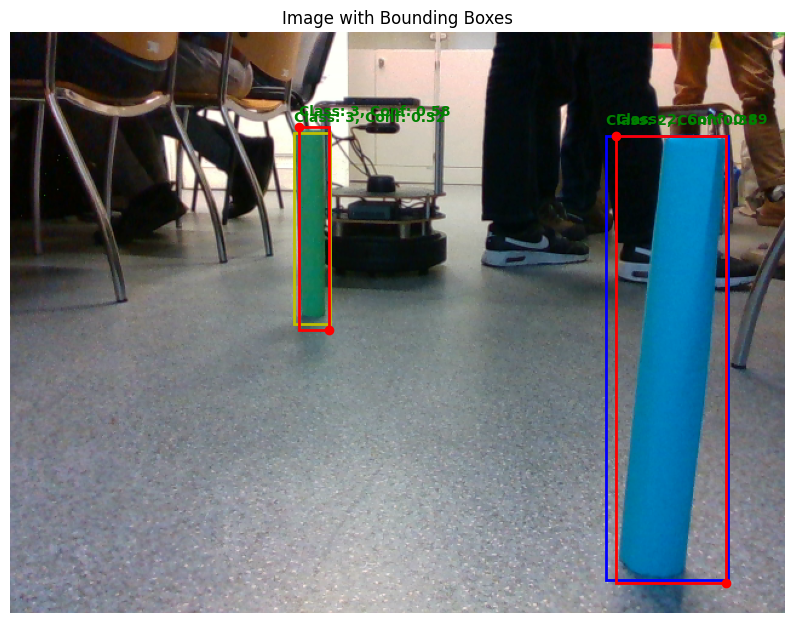


0: 128x160 1 blue, 1 green, 10.9ms
Speed: 0.6ms preprocess, 10.9ms inference, 0.6ms postprocess per image at shape (1, 3, 128, 160)
preprocess time: 0.00041710200093802996
(1, 3, 160, 160)
1
inference time: 0.006601048000447918
0.0021592975
[     157.62      171.67       361.2      346.14]
results: [[     62.547      52.791      7.0917      49.401     0.30239           3]
 [      62.41      53.662      6.8303      51.157     0.30896           3]
 [     62.476      53.515      6.5545      51.474     0.30234           3]
 [     62.755      53.825      6.7284      51.683     0.28798           3]
 [     136.09      89.389      23.468      122.53     0.31563           2]
 [     135.65      90.676      26.012      126.19     0.34438           2]
 [     135.87       90.13      24.703      125.54     0.37011           2]
 [     135.55      88.888      25.876      124.39     0.37472           2]
 [     135.93      88.088      24.747      123.26     0.37871           2]
 [     135.78       89.2

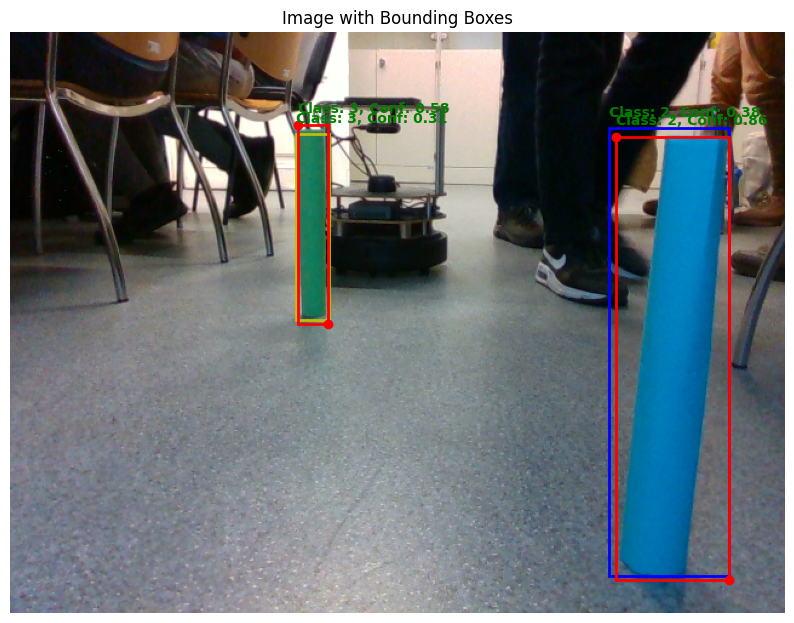


0: 128x160 1 blue, 1 green, 11.2ms
Speed: 0.8ms preprocess, 11.2ms inference, 0.7ms postprocess per image at shape (1, 3, 128, 160)
preprocess time: 0.0005933499996899627
(1, 3, 160, 160)
1
inference time: 0.005596115002845181
0.0018153489
[     158.15      173.67      364.21      348.09]
results: [[     62.551        53.3      7.3698      50.748     0.28706           3]
 [     62.411      53.848      7.0023      51.796     0.31007           3]
 [      62.52      53.545      6.6972      51.942     0.30594           3]
 [     62.777      53.861       6.786      52.155     0.28137           3]
 [     136.14      88.752       24.84      122.08     0.25434           2]
 [     136.11      89.741      23.763      123.82     0.32663           2]
 [     135.98      90.998      25.752      127.99     0.35193           2]
 [     136.06      90.713      24.808      127.53     0.37715           2]
 [     135.85      89.864      26.011      125.59     0.37073           2]
 [     136.12      89.045

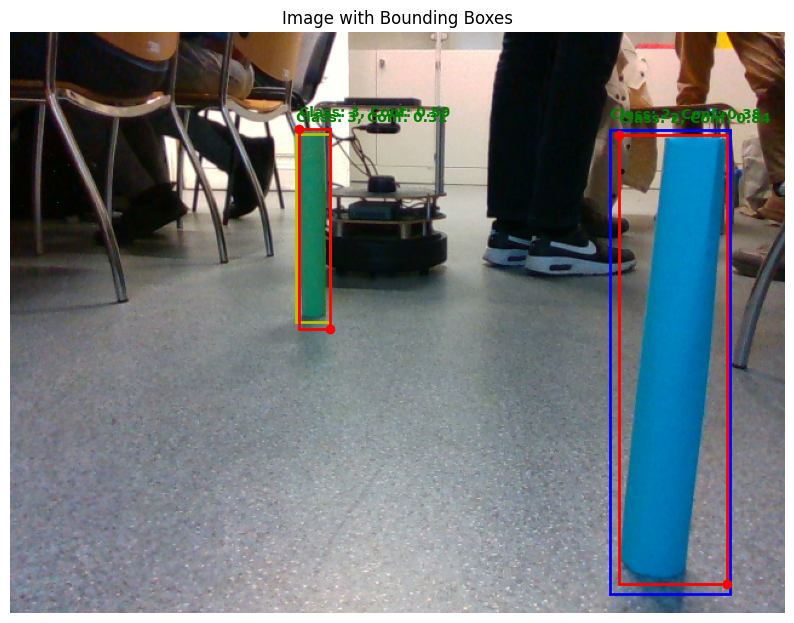

Output Name: output0, Shape: [1, 9, 525], Type: tensor(float)


In [201]:

# Load the model and create InferenceSession
model_path = "michaloviny/best_ones/v11n_120e_160p.onnx"
model = YOLO("michaloviny/best_ones/v11n_120e_160p.pt", task='detect')  # Load the exported ONNX model
model.to('cpu')
session = ort.InferenceSession(model_path)

# Get model input details
input_name = session.get_inputs()[0].name  # Get input layer name
input_shape = session.get_inputs()[0].shape  # Get input shape
input_dtype = session.get_inputs()[0].type  # Get input data type

print(f"Input Name: {input_name}, Shape: {input_shape}, Type: {input_dtype}")

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

def postprocess(result):
    return softmax(np.array(result))

def xywh2xyxy(x):
    # Convert xywh to xyxy format
    y = np.zeros(x.shape)
    y[:, 0] = x[:, 0] - x[:, 2] / 2
    y[:, 1] = x[:, 1] - x[:, 3] / 2
    y[:, 2] = x[:, 0] + x[:, 2] / 2
    y[:, 3] = x[:, 1] + x[:, 3] / 2
    return y

def nms(pred, conf_thresh, iou_thresh):
    pred = pred[pred[:, 4] > conf_thresh]

    if pred.numel() == 0:
        return None

    #pred[..., 5:] *= pred[..., 4:5]  # conf = obj_conf * cls_conf
    classes = pred[..., 5:].max(1).indices

    pred[:, :4] = xywh2xyxy(pred[:, :4])

    kept = torchvision.ops.boxes.nms(pred[:, :4], pred[:, 4], iou_thresh)

    pred = pred[kept, :][:, :5]
    classes = classes[kept]
    pred = torch.cat((pred, classes.unsqueeze(1)), dim=1)
    return pred

color_map = {
    0: 'r',    # Red
    1: 'g',    # Green
    2: 'b',    # Blue
    3: 'y',  # Yellow
    4: 'm',  # Magenta
}

# "Load and preprocess the input image inputTensor"
files = os.listdir('images')
print(files)
for img in files:
    img = np.load(os.path.join('images', img))
    #cv2.imshow('img', img)
    #cv2.waitKey(1)
    #cv2.destroyAllWindows()

    #image /= 255.0  # Normalize to [0, 1]

    #results = yolo_model.predict(img, conf=0.5)
    yolo_results = model(img)
    start = time.perf_counter()
    image = cv2.resize(img, (input_shape[3], input_shape[2])).astype(np.float32)
    image /= 255.0  # Normalize to [0, 1]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = np.transpose(image, (2, 0, 1))
    image = np.expand_dims(image, axis=0).astype(np.float32)
    print(f"preprocess time: {time.perf_counter() - start}")
    print(image.shape)
    start = time.perf_counter()
    outputs = session.run(None, {input_name: image})
    print(len(outputs))
    print(f"inference time: {time.perf_counter() - start}")
    start = time.perf_counter()
    print(np.max(outputs[0][0, 4,:]))
    #print(f"data_cls: {outputs[0][0, :4, :].T.shape} {outputs[0][0, 4:, :][data_cls, np.arange(data_cls.shape[0])].reshape(-1,1).shape} {data_cls.reshape(-1, 1).shape}")
    cls_prob = softmax(outputs[0][0, 4:,:])
    data_cls = np.argmax(cls_prob, axis=0)
    print(np.max(outputs[0][0, :4, :], axis=1))
    results = np.hstack((outputs[0][0, :4, :].T, cls_prob[data_cls, np.arange(data_cls.shape[0])].reshape(-1,1), data_cls.reshape(-1, 1)))
    #results = nms(torch.from_numpy(results), 0.25, 0.1).detach().numpy()
    results = results[results[:, 4] > 0.25]
    print(f"results: {results}")
    results[:, :4] = xywh2xyxy(results[:, :4])
    kept = torchvision.ops.boxes.nms(torch.from_numpy(results[:, :4]), torch.from_numpy(results[:, 4]), 0.01).detach().numpy()
    print(f"kept: {kept}")
    results = results[kept, :]
    #print(f"cls_prob: {cls_prob[:]}")
    #filter_confidence = 0.2
    #conf_mask = np.any(cls_prob[:, :] > filter_confidence, axis=0)
    #data_cls = np.argmax(cls_prob[:, conf_
    # mask], axis=0)
    #print(f"data_cls: {data_cls}")
    #print(cls_prob[:, conf_mask].shape)
    #result = np.hstack((outputs[0][0,:4,conf_mask], data_cls.reshape(-1, 1), cls_prob[:, conf_mask][data_cls, :]))
    print(f"postprocess time: {time.perf_counter() - start}")
    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    print(f"img shape: {img.shape}")
# Iterate over each bounding box in the array
    for bbox in results:
        x1, y1, x2, y2, conf, data_cls = bbox
        # Create a Rectangle patch
        #plt.plot(y2, y1, 'go')
        x1 = 640/input_shape[2]*x1
        x2 = 640/input_shape[2]*x2
        y1 = 480/input_shape[2]*y1
        y2 = 480/input_shape[2]*y2
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor=color_map[data_cls], facecolor='none')
        
        # Add the rectangle to the plot
        ax.add_patch(rect)
        
        # Display the confidence score and class label near the box
        label = f'Class: {int(data_cls)}, Conf: {conf:.2f}'
        ax.text(x1, y1 - 10, label, color='green', fontsize=10, weight='bold')
    

    for bbox in yolo_results[0].boxes.data:
        x1, y1, x2, y2, conf, data_cls = bbox.cpu().numpy()
        
        plt.plot(x1, y1, 'ro')
        plt.plot(x2, y2, 'ro')
        # Create a Rectangle patch
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
        
        # Add the rectangle to the plot
        ax.add_patch(rect)
        
        # Display the confidence score and class label near the box
        label = f'Class: {int(data_cls)}, Conf: {conf:.2f}'
        ax.text(x1, y1 - 10, label, color='green', fontsize=10, weight='bold')

    # Set the title for the plot
    ax.set_title("Image with Bounding Boxes")

    # Hide axis labels
    ax.axis('off')

    # Show the plot
    plt.show()

    #print(f"result: {result}")

output_info = session.get_outputs()
for output in output_info:
    print(f"Output Name: {output.name}, Shape: {output.shape}, Type: {output.type}")